## import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
sns.set_style('darkgrid')

In [2]:
#read data
df=pd.read_csv('SA_Aqar.csv')
df.head()

,city,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,RIYADH,north,250.0,0.0,5.0,5.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,"80,000"
1,RIYADH,south,370.0,0.0,4.0,5.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,"60,000"
2,RIYADH,south,380.0,0.0,4.0,5.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,"60,000"
3,RIYADH,west,250.0,0.0,5.0,5.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"55,000"
4,RIYADH,west,400.0,11.0,7.0,5.0,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,"70,000"


In [3]:
df.shape

(3719, 22)

In [4]:
#confirm nuls and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          3718 non-null   object 
 1   front         3718 non-null   object 
 2   size          3718 non-null   float64
 3   property_age  3718 non-null   float64
 4   bedrooms      3718 non-null   float64
 5   bathrooms     3718 non-null   float64
 6   livingrooms   3718 non-null   float64
 7   kitchen       3718 non-null   float64
 8   garage        3718 non-null   float64
 9   driver_room   3718 non-null   float64
 10  maid_room     3718 non-null   float64
 11  furnished     3718 non-null   float64
 12  ac            3718 non-null   float64
 13  roof          3718 non-null   float64
 14  pool          3718 non-null   float64
 15  frontyard     3718 non-null   float64
 16  basement      3718 non-null   float64
 17  duplex        3718 non-null   float64
 18  stairs        3718 non-null 

In [5]:
df['city'].value_counts()

 KHOBAR    976
 RIYADH    960
 DAMMAM    894
 JEDDAH    888
Name: city, dtype: int64

In [6]:
df['front'].value_counts()

north         917
east          776
west          771
south         739
north east    147
south east    141
south west    112
north west     83
3 شوارع        23
4 شوارع         9
Name: front, dtype: int64

<AxesSubplot:title={'center':'City Class Balance'}, xlabel='class', ylabel='Relative Frequency'>

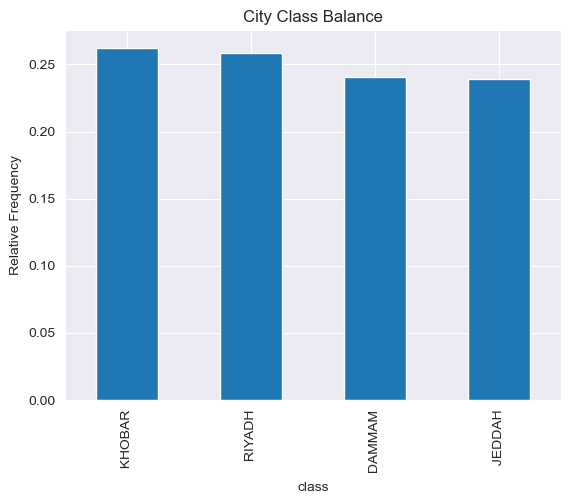

In [7]:
# Plot value counts of `"city"`
df["city"].value_counts(normalize=True).plot(
kind="bar", xlabel="class", ylabel="Relative Frequency",title="City Class Balance")


<AxesSubplot:title={'center':'Front Class Balance'}, xlabel='class', ylabel='Relative Frequency'>

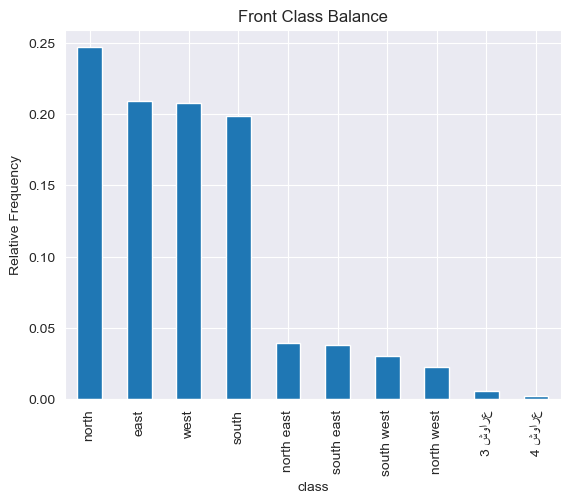

In [8]:
# Plot value counts of `"front"`
df["front"].value_counts(normalize=True).plot(
kind="bar", xlabel="class", ylabel="Relative Frequency",title="Front Class Balance")


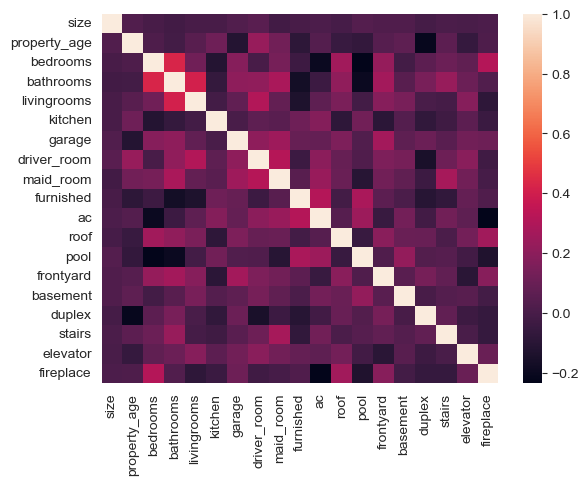

In [9]:
# Create correlation matrix
correlation = df.select_dtypes("number").corr()
correlation
# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [10]:
correlation

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace
size,1.000000,0.026605,-0.001659,-0.020684,-0.003165,-0.002841,0.026136,0.050188,-0.019671,0.000228,0.014276,-0.005264,0.037103,0.024471,0.019690,-0.010833,0.009946,0.004103,0.014135
property_age,0.026605,1.000000,0.019242,-0.015376,0.045143,0.113298,-0.115827,0.229479,0.123351,-0.086590,0.037264,-0.051128,-0.067364,0.040116,0.065122,-0.212236,0.059045,-0.061000,0.017599
bedrooms,-0.001659,0.019242,1.000000,0.428383,0.117873,-0.117855,0.180438,-0.001162,0.136515,-0.035578,-0.200039,0.260171,-0.233998,0.226132,-0.018852,0.059557,0.105136,0.068742,0.309624
bathrooms,-0.020684,-0.015376,0.428383,1.000000,0.407682,-0.064741,0.207669,0.212013,0.281067,-0.170169,-0.042818,0.208967,-0.201461,0.264357,0.048366,0.145092,0.229664,0.102957,0.025026
livingrooms,-0.003165,0.045143,0.117873,0.407682,1.000000,-0.017165,0.073331,0.308451,0.081950,-0.135604,0.067642,0.149828,-0.015394,0.179971,0.143856,0.004689,-0.012590,0.182475,-0.081845
kitchen,-0.002841,0.113298,-0.117855,-0.064741,-0.017165,1.000000,0.003030,0.063800,0.053458,0.112787,0.175524,-0.082984,0.121265,-0.095389,0.038742,-0.072476,-0.030222,0.059358,-0.045981
garage,0.026136,-0.115827,0.180438,0.207669,0.073331,0.003030,1.000000,0.204983,0.249873,0.092054,0.085330,0.156525,0.026654,0.262338,0.067415,0.104766,0.049328,0.125179,0.109371
driver_room,0.050188,0.229479,-0.001162,0.212013,0.308451,0.063800,0.204983,1.000000,0.314959,-0.038470,0.195619,0.091367,0.021291,0.159256,0.139336,-0.151171,0.110739,0.192867,-0.028066
maid_room,-0.019671,0.123351,0.136515,0.281067,0.081950,0.053458,0.249873,0.314959,1.000000,0.046504,0.233394,0.098584,-0.109109,0.121861,0.069712,-0.042543,0.272245,0.121239,-0.007001
furnished,0.000228,-0.086590,-0.035578,-0.170169,-0.135604,0.112787,0.092054,-0.038470,0.046504,1.000000,0.314005,-0.018620,0.284684,0.058777,0.005948,-0.106705,-0.073224,0.086449,0.020782


In [11]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

city       4
front     10
price    123
dtype: int64

In [12]:
#check missing prices
df['price'].isna().sum()

1

In [13]:
#drop missing entry
df.dropna(subset = ['price'], inplace=True)
df.shape

(3718, 22)

In [14]:
#convert price to float
df['price'] = df['price'].replace(',','', regex=True)

df['price']=df['price'].astype('float')
df['price']

0       80000.0
1       60000.0
2       60000.0
3       55000.0
4       70000.0
         ...   
3713    60000.0
3714    55000.0
3715    37000.0
3716    90000.0
3717    60000.0
Name: price, Length: 3718, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3718 entries, 0 to 3717
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          3718 non-null   object 
 1   front         3718 non-null   object 
 2   size          3718 non-null   float64
 3   property_age  3718 non-null   float64
 4   bedrooms      3718 non-null   float64
 5   bathrooms     3718 non-null   float64
 6   livingrooms   3718 non-null   float64
 7   kitchen       3718 non-null   float64
 8   garage        3718 non-null   float64
 9   driver_room   3718 non-null   float64
 10  maid_room     3718 non-null   float64
 11  furnished     3718 non-null   float64
 12  ac            3718 non-null   float64
 13  roof          3718 non-null   float64
 14  pool          3718 non-null   float64
 15  frontyard     3718 non-null   float64
 16  basement      3718 non-null   float64
 17  duplex        3718 non-null   float64
 18  stairs        3718 non-null 

In [16]:
# #convert categorical values into dummies
# df = pd.get_dummies(df, columns = ['city', 'front'])
# df


### Split

In [17]:
target = "price"
X = df.drop(columns=target)
y = df[target]

### Randomised Train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2974, 21)
y_train shape: (2974,)
X_test shape: (744, 21)
y_test shape: (744,)


### cross validation

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2,random_state=42)

### Build Model


In [20]:
model = make_pipeline(
        OrdinalEncoder(),DecisionTreeClassifier(max_depth=10,random_state=42)# Try adjusting the depth value
    )
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['city', 'front'],
                                mapping=[{'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping':  KHOBAR    1
 JEDDAH    2
 DAMMAM    3
 RIYADH    4
NaN       -2
dtype: int64},
                                         {'col': 'front',
                                          'data_type': dtype('O'),
                                          'mapping': west           1
east           2
south          3
north          4
south east     5
south west     6
north east     7
north west     8
3 شوارع        9
4 شوارع       10
NaN           -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [21]:
### Calculate accuracy scores and Validation scores
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.75
Validation Accuracy: 0.62


In [22]:
# accessing obejects in pipeline
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 10


In [23]:
## initistiate iteration range
depth_hyperparams = range(1,100,2)

In [24]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        OrdinalEncoder(),DecisionTreeClassifier(max_depth=d,random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.12652374947456915, 0.21101303068516183, 0.3745271122320303]
Validation Accuracy Scores: [0.13949579831932774, 0.2218487394957983, 0.35798319327731093]


### Plot Trainning Accuracy vs Validation Accuracy

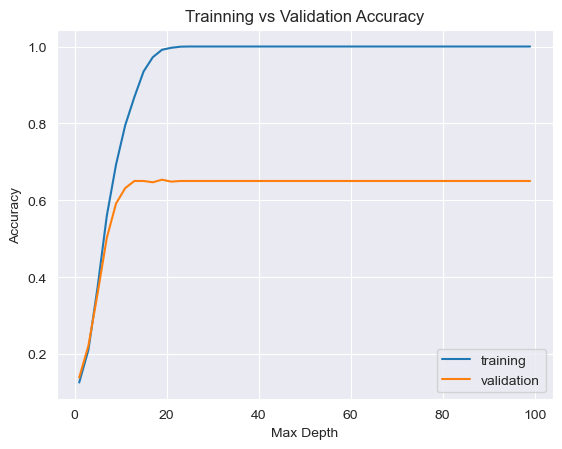

In [25]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams,training_acc,label="training")
plt.plot(depth_hyperparams,validation_acc,label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Trainning vs Validation Accuracy");

In [26]:
## From the graph above our best max depth is 4

In [27]:
test_acc = model.score(X_test,y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.58


### Plot Decision Logic

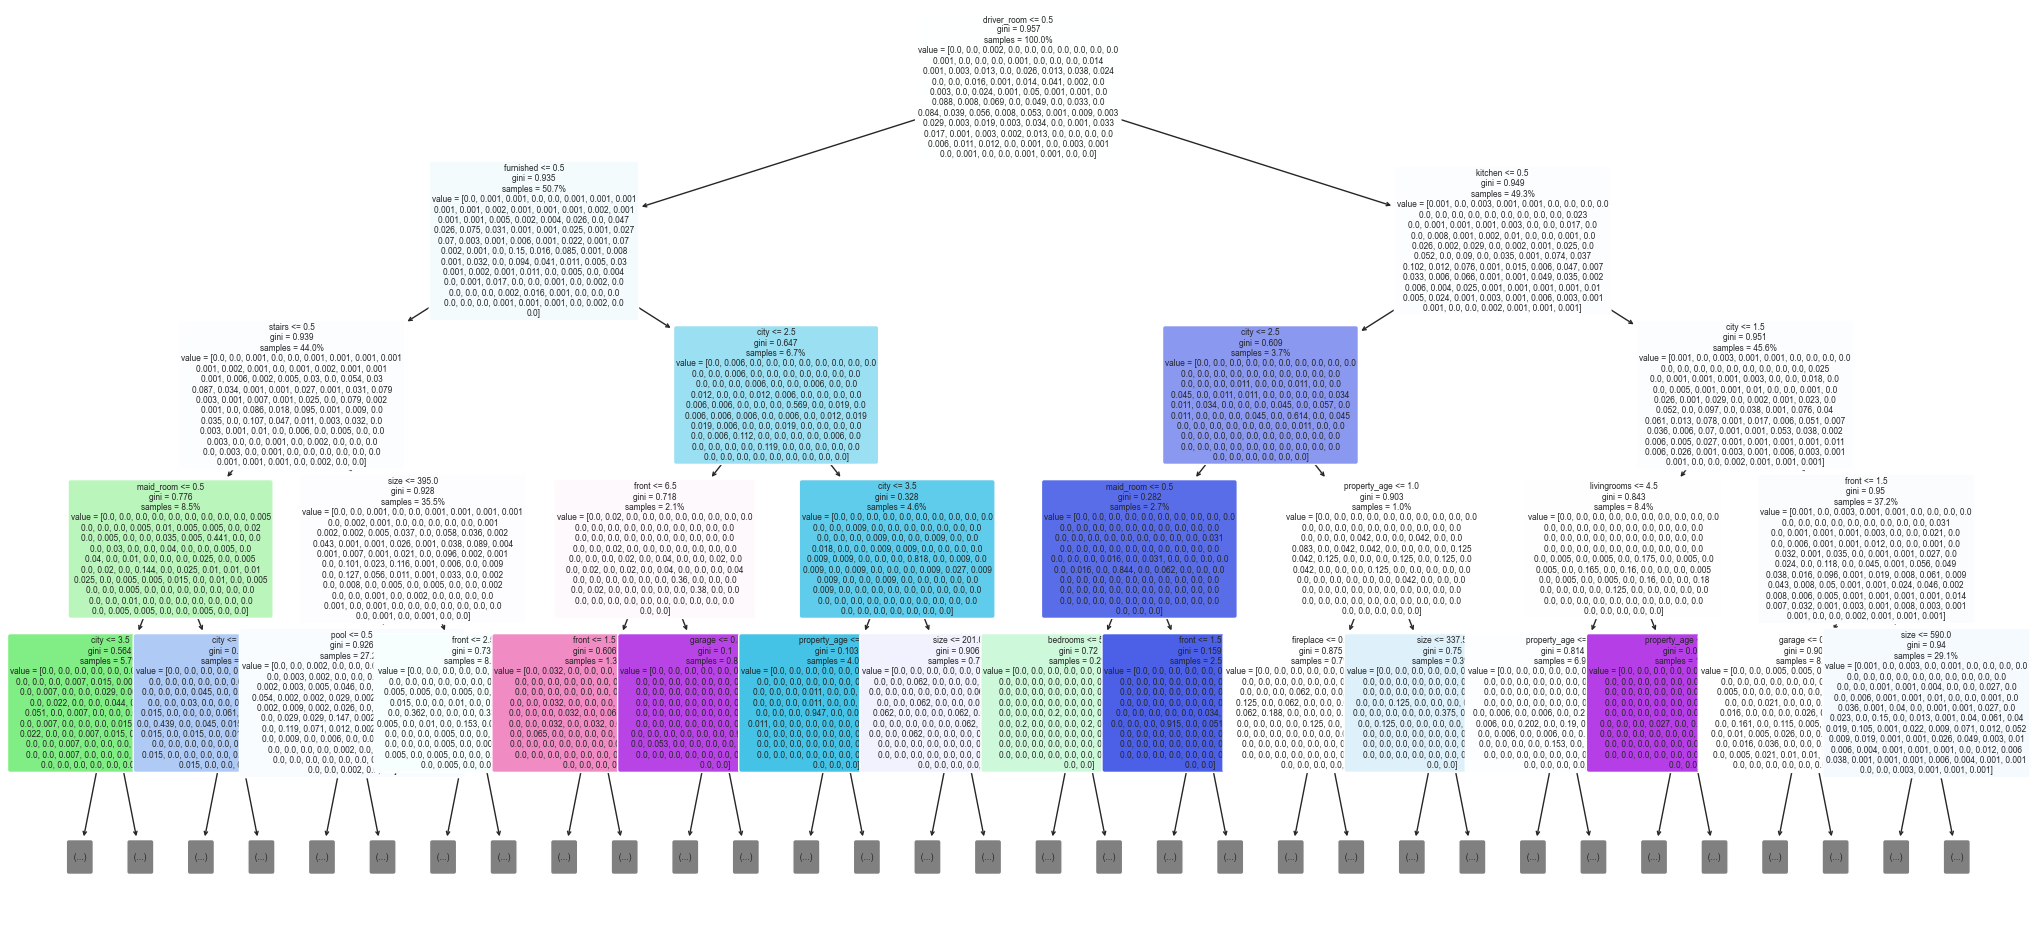

In [28]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=4,  # Only display first 3 levels
    fontsize=6,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [29]:
# acccess feature importance objects from our pipeline
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['city', 'front', 'size'], dtype='object')
Importances: [0.13779856 0.07889834 0.18273278]


In [30]:
feat_imp = pd.Series(importances,index=features).sort_values()
feat_imp.head()

roof        0.008515
basement    0.010433
kitchen     0.018031
elevator    0.019733
ac          0.021226
dtype: float64

### Plot by importance of  each feature

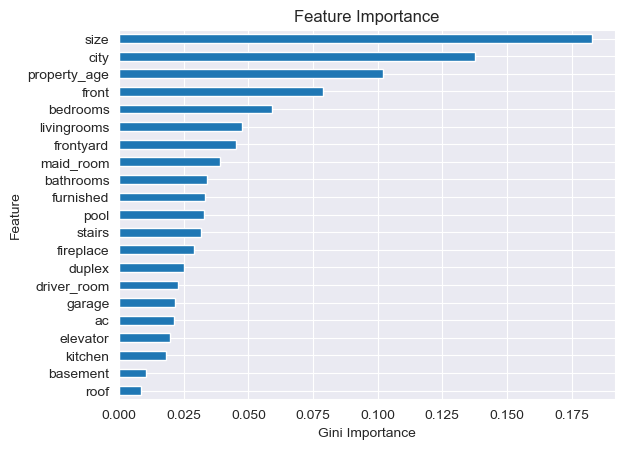

In [31]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");